# Business Understanding

## Project Domain

Domain Proyek Prediksi Harga Rumah.
Proyek ini berfokus pada pengembangan sistem memprediksi harga rumah berdasarkan fitur-fitur seperti luas area, jumlah kamar tidur, fasilitas, dan lokasi. Dengan model prediksi yang akurat, pengguna seperti agen properti, pembeli, atau penjual dapat membuat keputusan yang lebih baik terkait transaksi properti.  sehingga dapat menghasilkan prediksi harga yang lebih akurat, seperti:
1. Analitik Data Real Estat: Menggunakan atribut properti (misalnya luas tanah, jumlah kamar tidur dan mandi, fasilitas, serta kondisi perabotan), serta kondisi pasar untuk melakukan analisis yang mendalam.
2. Pengambilan Keputusan yang Lebih Baik: - Membantu pembeli membuat pilihan yang lebih terinformasi sesuai kebutuhan dan anggaran mereka. - Memudahkan penjual menentukan harga yang kompetitif dan realistis. - Memberi investor prediksi harga yang lebih akurat untuk memaksimalkan keuntungan.
3. Otomatisasi dan Model Prediktif: Mengaplikasikan machine learning atau metode statistik lainnya untuk memprediksi harga berdasarkan variabel penting seperti luas, fasilitas, dan status perabotan.
4. Akses Pasar yang Lebih Mudah: Meningkatkan transparansi dan efisiensi dalam transaksi properti melalui wawasan berbasis data untuk semua pemangku kepentingan.

## Problem Statements

1. Pasar properti sangat fluktuatif dan dipengaruhi oleh berbagai faktor seperti lokasi, ukuran, tren pasar, dan kondisi ekonomi. Menetapkan harga yang adil dan akurat bisa menjadi tantangan yang cukup rumit.
2. Para pembeli sering mengalami kesulitan dalam menentukan apakah harga sebuah properti terlalu mahal atau terlampau murah, yang berpotensi menyebabkan kerugian finansial.
3. Penjual dan agen properti menghadapi tantangan dalam menetapkan harga yang kompetitif dan menarik minat pembeli, tanpa merugikan nilai properti itu sendiri.
4. Investor memerlukan prediksi yang akurat agar dapat memaksimalkan keuntungan sekaligus meminimalkan risiko di pasar real estat yang selalu berubah dan dinamis.

## Goals

1. Mengembangkan model berbasis data yang mampu memprediksi harga rumah secara akurat dengan mempertimbangkan faktor-faktor utama seperti lokasi, ukuran (luas bangunan dan jumlah kamar), usia properti, fasilitas serta infrastruktur, dan tren pasar.
2. Memberikan estimasi harga yang wajar kepada pembeli dan penjual, sehingga mereka dapat membuat keputusan yang lebih informasi dan tepat.
3. Meningkatkan transparansi dan efisiensi di pasar properti melalui pemanfaatan analitik prediktif.
4. Meningkatkan profitabilitas bagi investor properti dengan prediksi harga yang lebih akurat.

## Solution Statements

* Pengembangan Model
Membuat model prediksi menggunakan Recurrent Neural Network (RNN) dengan kerangka kerja TensorFlow untuk menghasilkan prediksi harga rumah yang akurat.
* Implementasi
 Mengintegrasikan model ke dalam aplikasi web berbasis Streamlit agar pengguna dapat dengan mudah melakukan prediksi secara langsung.
* Peningkatan Performa
Mengonversi model ke dalam format TensorFlow Lite agar tetap optimal saat dijalankan di perangkat dengan sumber daya terbatas.
* Evaluasi
Melakukan pengukuran performa model menggunakan metrik seperti Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) untuk

# Data Understanding

## Import data dari kaggle

In [188]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mochtegar","key":"75aac82c61ad903a5ee1d49d0f100e41"}'}

In [189]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [190]:
!kaggle datasets download -d harishkumardatalab/housing-price-prediction

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0
housing-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [191]:
!mkdir housing-price-dataset
!unzip housing-price-prediction.zip -d housing-price-dataset
!ls housing-price-dataset

mkdir: cannot create directory ‘housing-price-dataset’: File exists
Archive:  housing-price-prediction.zip
replace housing-price-dataset/Housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: housing-price-dataset/Housing.csv  
Housing.csv


## Import Library yang dibutuhkan

In [192]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_regression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [193]:
df = pd.read_csv('/content/housing-price-dataset/Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Exploratory Data Analysis

In [195]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [196]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


<ipython-input-197-f28f370bde70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")


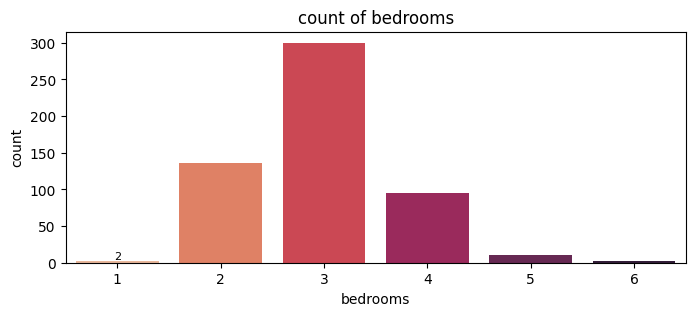

In [197]:
plt.figure(figsize=(8,3))
ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

In [198]:
count_bathrooms = df['bathrooms'].value_counts()
count_bathrooms

,count
bathrooms,
1,401
2,133
3,10
4,1


<ipython-input-199-ace15c0614bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_bathrooms.index,y=count_bathrooms.values,palette="mako")


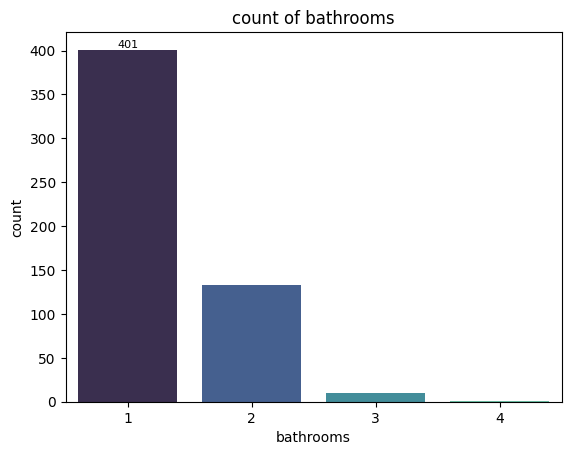

In [199]:
ax = sns.barplot(x=count_bathrooms.index,y=count_bathrooms.values,palette="mako")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

In [200]:
stories_count = df['stories'].value_counts()
stories_count

,count
stories,
2,238
1,227
4,41
3,39


<ipython-input-201-bc674e905895>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")


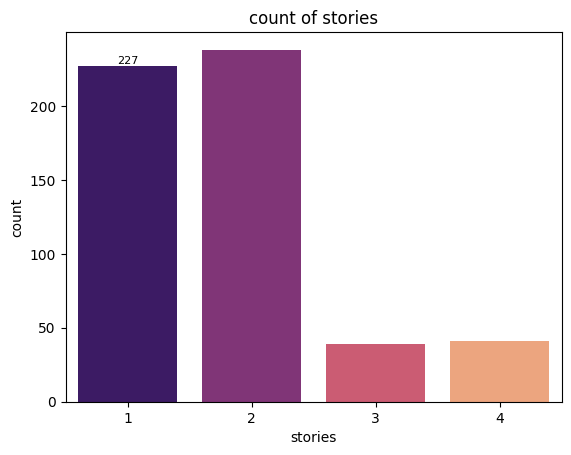

In [201]:
ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('count of stories')
plt.xlabel('stories')
plt.ylabel('count')
plt.show()

In [202]:
count_mainroad=df['mainroad'].value_counts()
count_mainroad

,count
mainroad,
yes,468
no,77


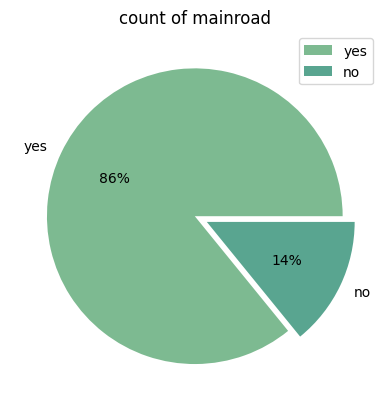

In [203]:
explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(count_mainroad.values,
        labels=count_mainroad.index,
        autopct='%.0f%%',explode=explode,
        colors = colors)
plt.title("count of mainroad")
plt.legend(loc = "best")

plt.show()

In [204]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count

,count
guestroom,
no,448
yes,97


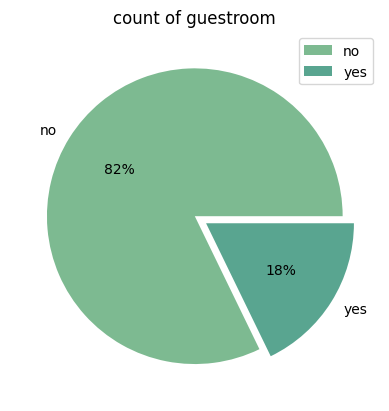

In [205]:
explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(guestroom_count.values,
        labels=guestroom_count.index,
        autopct='%.0f%%',explode=explode,
        colors = colors)
plt.title("count of guestroom")
plt.legend(loc = "best")

plt.show()

In [206]:
furnishingstatus_count = df.furnishingstatus.value_counts()
furnishingstatus_count


,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


<ipython-input-207-7a2cf6d7d9f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=furnishingstatus_count.index,


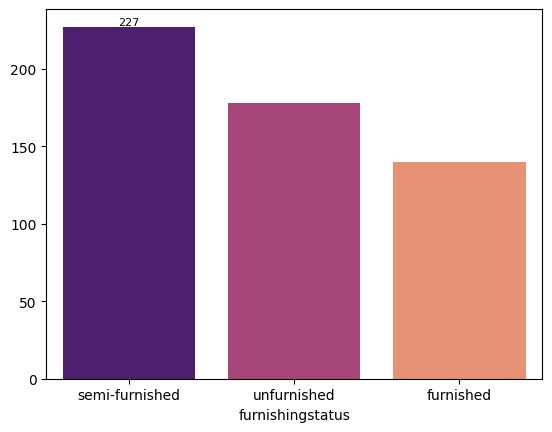

In [207]:
ax = sns.barplot(x=furnishingstatus_count.index,
                 y=furnishingstatus_count.values,
                 palette="magma"

                )
ax.bar_label(ax.containers[0], fontsize=8)
plt.show()

In [208]:
prefarea_count = df.prefarea.value_counts()
prefarea_count

,count
prefarea,
no,417
yes,128


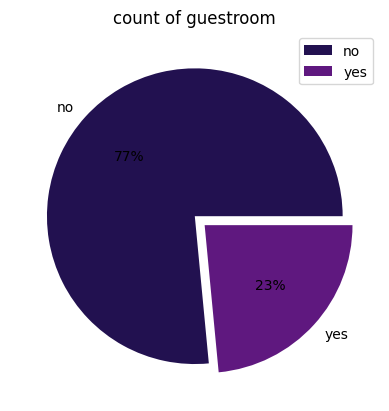

In [209]:
explode = [0, 0.09]
colors = sns.color_palette("magma")
plt.pie(prefarea_count.values,
        labels=prefarea_count.index,
        autopct='%.0f%%',explode=explode,
        colors = colors)
plt.title("count of guestroom")
plt.legend(loc = "best")

plt.show()

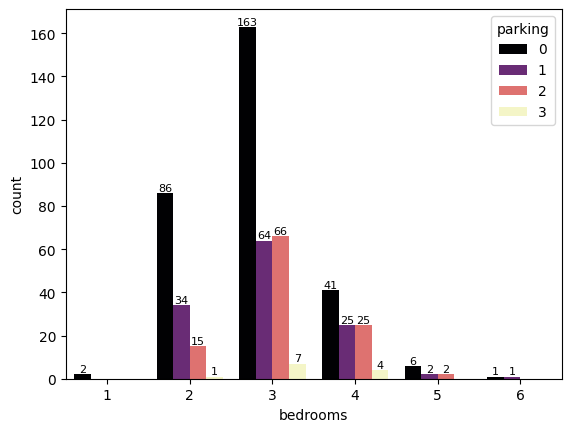

In [210]:
ax = sns.countplot(df, x="bedrooms", hue="parking",palette="magma")
for i in range(len(df['parking'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)


plt.show()

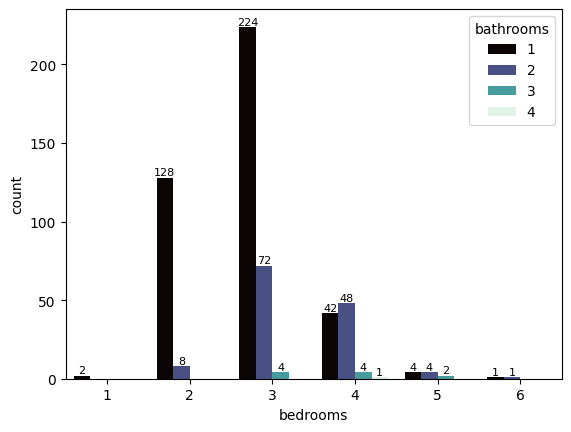

In [211]:
ax = sns.countplot(df, x="bedrooms", hue="bathrooms",palette="mako")
for i in range(len(df['bathrooms'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.show()

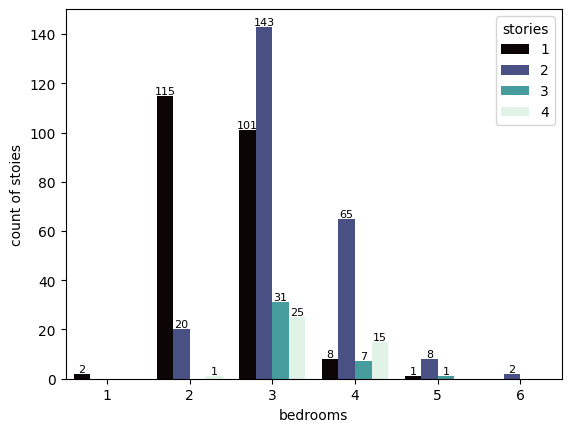

In [212]:
ax = sns.countplot(df, x="bedrooms", hue="stories",palette="mako")
for i in range(len(df['stories'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of stoies')
plt.show()

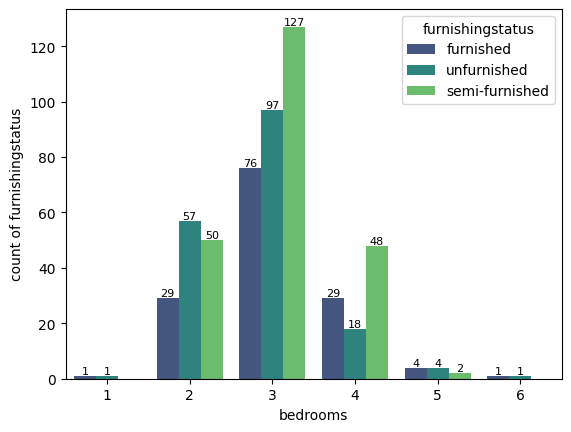

In [213]:
ax = sns.countplot(df, x="bedrooms", hue="furnishingstatus",palette="viridis")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

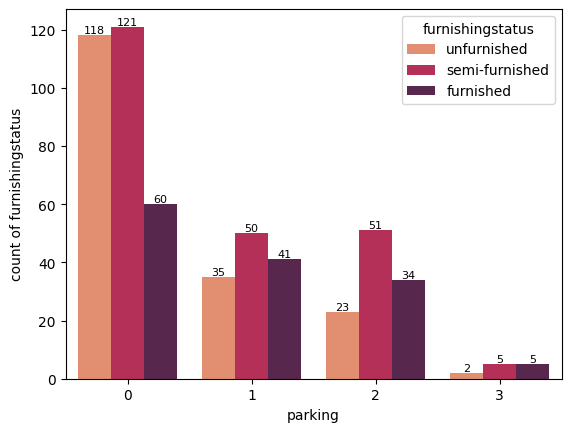

In [214]:
ax = sns.countplot(df, x="parking", hue="furnishingstatus",palette="rocket_r")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

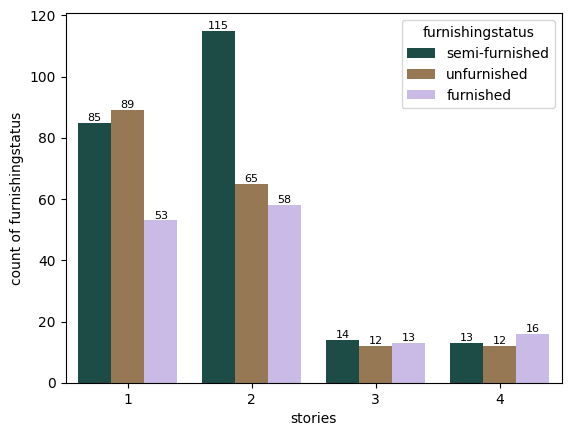

In [215]:
ax = sns.countplot(df, x="stories", hue="furnishingstatus",palette="cubehelix")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

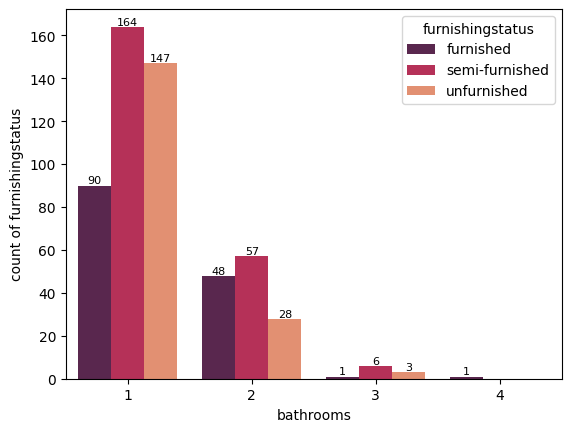

In [216]:
ax = sns.countplot(df, x="bathrooms", hue="furnishingstatus",palette="rocket")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

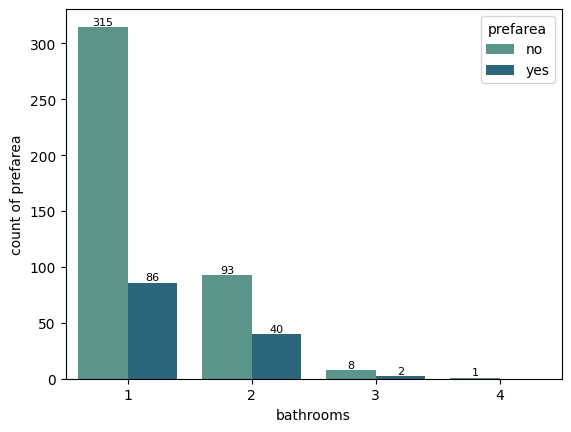

In [217]:
ax = sns.countplot(df, x="bathrooms", hue="prefarea",palette="crest")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

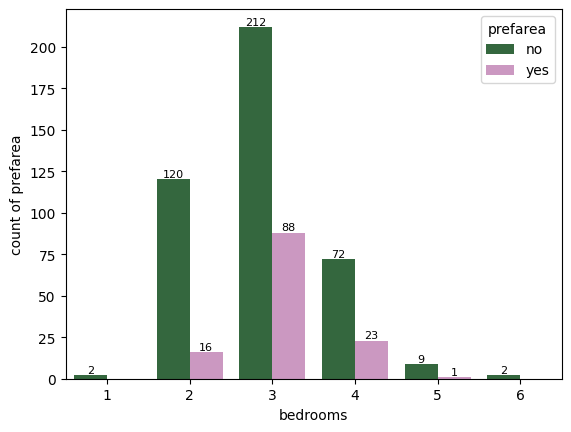

In [218]:
ax = sns.countplot(df, x="bedrooms", hue="prefarea",palette="cubehelix")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

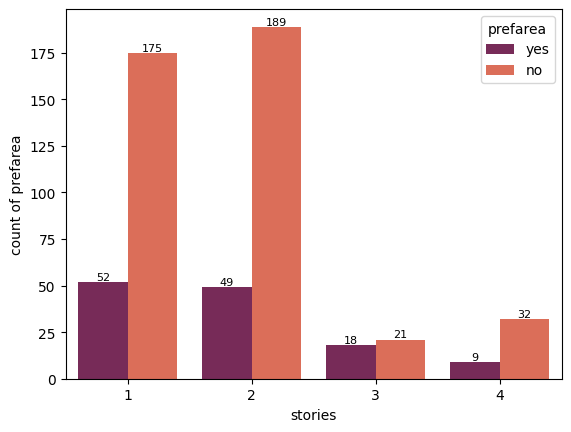

In [219]:
ax = sns.countplot(df, x="stories", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

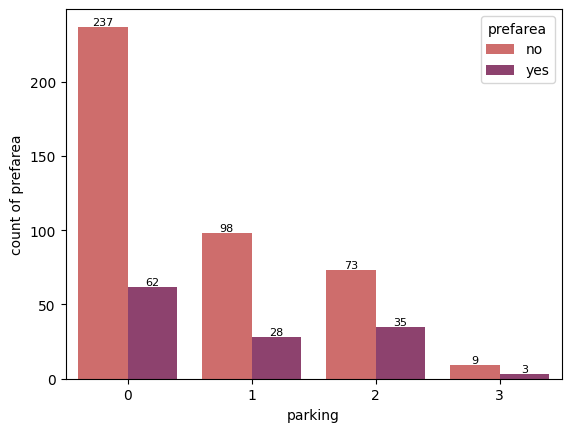

In [220]:
ax = sns.countplot(df, x="parking", hue="prefarea",palette="flare")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

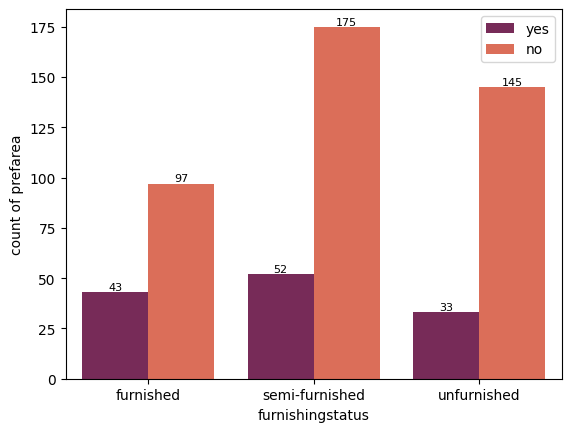

In [221]:
ax = sns.countplot(df, x="furnishingstatus", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.legend(loc = 'best')
plt.show()

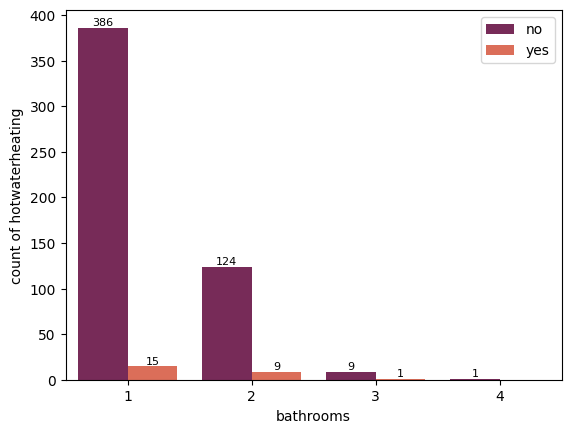

In [222]:
ax = sns.countplot(df, x="bathrooms", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

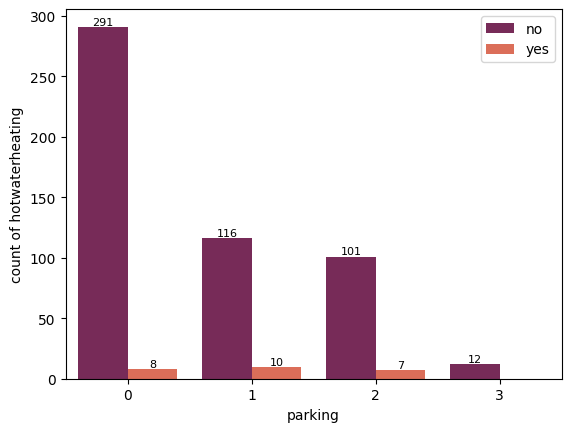

In [223]:
ax = sns.countplot(df, x="parking", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

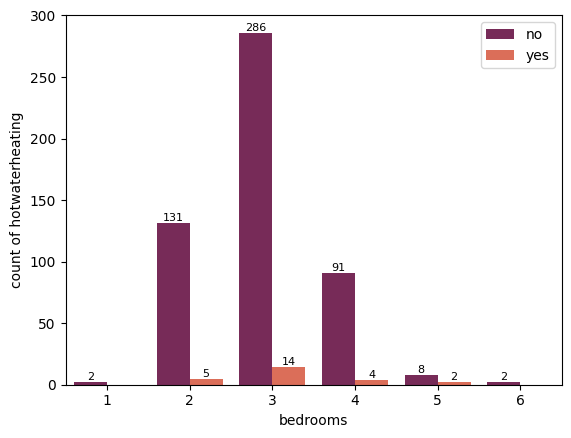

In [224]:
ax = sns.countplot(df, x="bedrooms", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

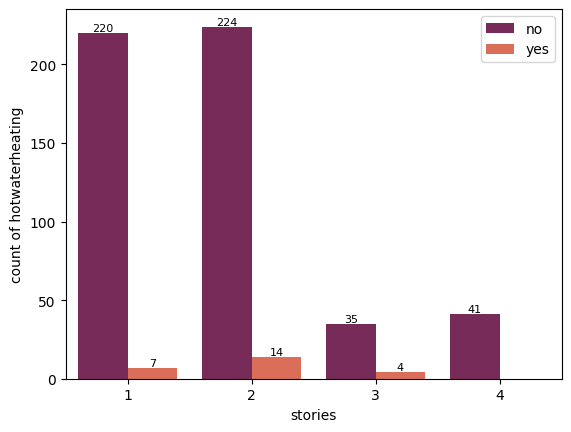

In [225]:
ax = sns.countplot(df, x="stories", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

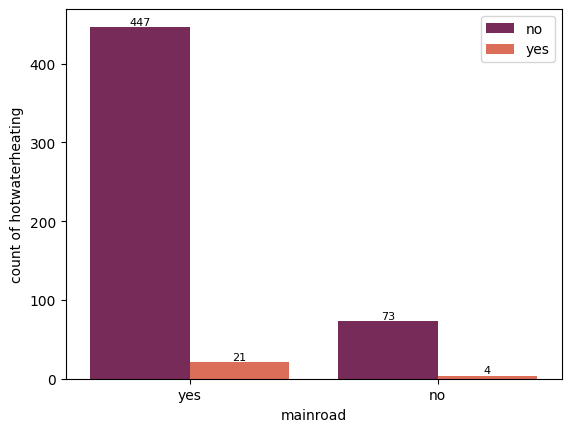

In [226]:
ax = sns.countplot(df, x="mainroad", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

# Data Preparation

In [227]:
# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [228]:
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                              'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)



In [229]:
X['area_per_bedroom'] = X['area'] / (X['bedrooms'] + 1)  # +1 to avoid division by zero
X['bathroom_bedroom_ratio'] = X['bathrooms'] / (X['bedrooms'] + 1)
X['parking_per_area'] = X['parking'] / (X['area'] + 1)


In [230]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures after scaling and interaction features:")
print(X.head())


Features after scaling and interaction features:
       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692      0.405623   
1  1.757010  1.403419   5.405809  2.532024  2.679409      0.405623   
2  2.218232  0.047278   1.421812  0.224410  1.517692      0.405623   
3  1.083624  1.403419   1.421812  0.224410  2.679409      0.405623   
4  1.046726  1.403419  -0.570187  0.224410  1.517692      0.405623   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0      -0.465315     -0.734539            -0.219265             1.472618   
1      -0.465315     -0.734539            -0.219265             1.472618   
2      -0.465315      1.361397            -0.219265            -0.679063   
3      -0.465315      1.361397            -0.219265             1.472618   
4       2.149083      1.361397            -0.219265             1.472618   

   prefarea_yes  furnishingstatus_semi-furnished  \
0      1.804941     

In [231]:
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

In [232]:
selected_features = X.columns[selector.get_support()]
print("\nSelected features:", selected_features.tolist())


Selected features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'airconditioning_yes', 'prefarea_yes', 'area_per_bedroom', 'bathroom_bedroom_ratio']


In [233]:
X = pd.DataFrame(X_selected, columns=selected_features)

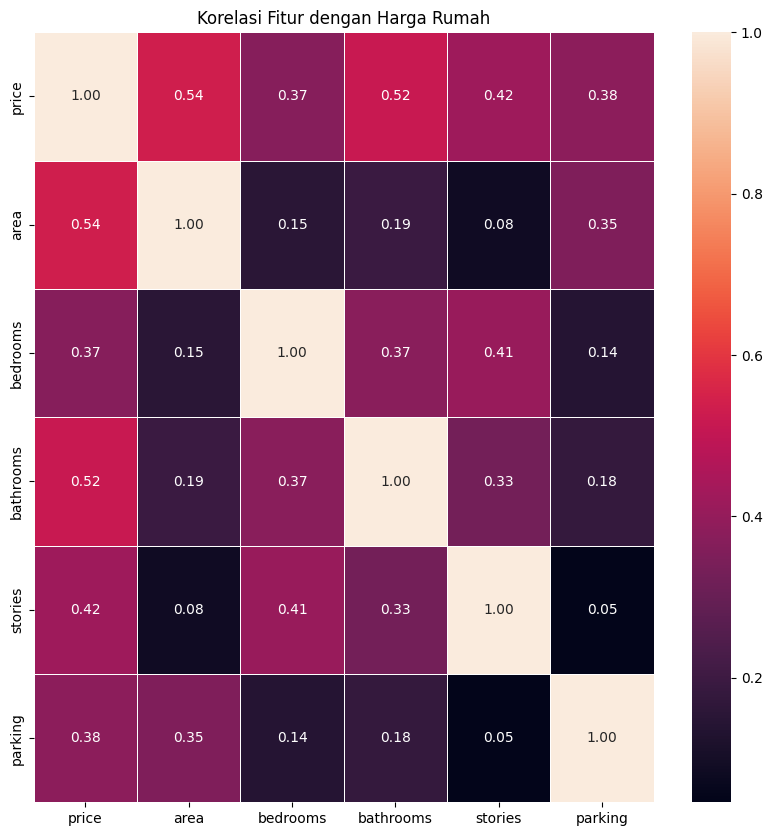

In [234]:
plt.figure(figsize=(10, 10))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Korelasi Fitur dengan Harga Rumah")
plt.show()


In [235]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [236]:
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [237]:
model = keras.Sequential([
    layers.LSTM(128, activation="relu", return_sequences=True,
               input_shape=(X_train_reshaped.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(64, activation="relu", return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [238]:
# Kompilasi model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

In [239]:

# Menampilkan arsitektur model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,985 (507.75 KB)

 Trainable params: 129,985 (507.75 KB)

 Non-trainable params: 0 (0.00 B)

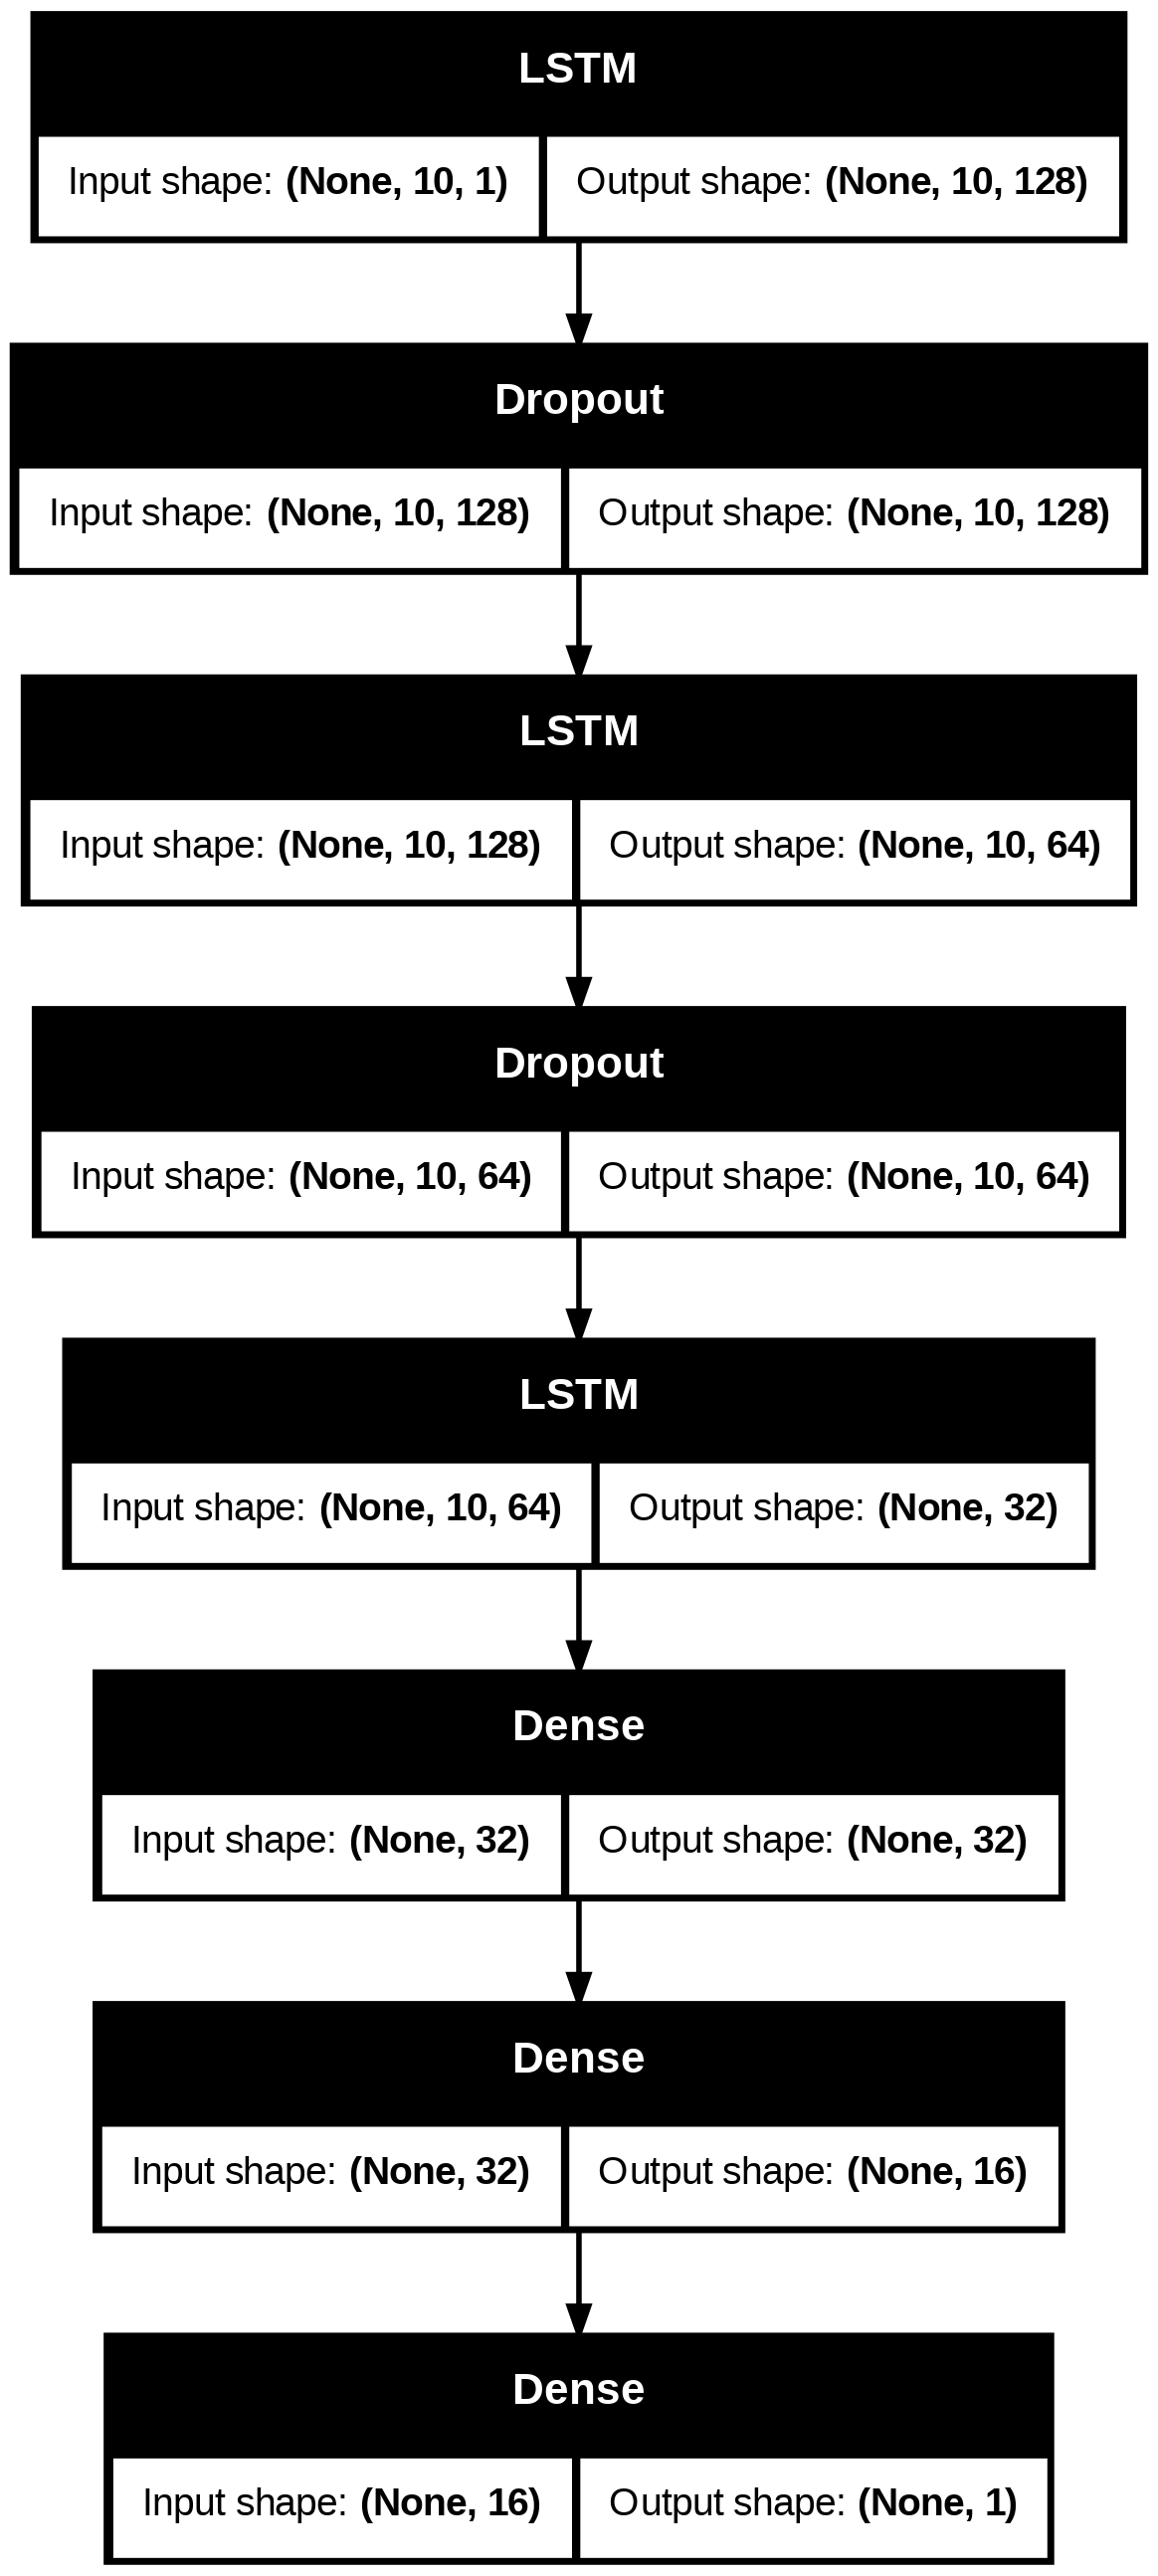

In [240]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [241]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

In [242]:
history = model.fit(X_train_reshaped, y_train,
                   epochs=100,
                   batch_size=32,
                   validation_data=(X_test_reshaped, y_test),
                   callbacks=[early_stopping])


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - loss: 24805701058560.0000 - mae: 4683798.0000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24635248738304.0000 - mae: 4665792.0000 - val_loss: 30129988304896.0000 - val_mae: 5007536.0000
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27353826721792.0000 - mae: 4860613.0000 - val_loss: 30129354964992.0000 - val_mae: 5007485.0000
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25229246070784.0000 - mae: 4680971.0000 - val_loss: 30050489466880.0000 - val_mae: 5000904.0000
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26705299243008.0000 - mae: 4793263.0000 - val_loss: 24289124286464.0000 - val_mae: 4459407.5000
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20392620064768.0000 - mae: 3445274.7500 - val_loss: 11815784284160.0000 - val_mae: 2786152.2500
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10

# Evaluation

In [243]:
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"\nMean Absolute Error: {test_mae:.4f}")
print(f"Loss Model (MSE): {test_loss:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2600662204416.0000 - mae: 1252843.7500 

Mean Absolute Error: 1253215.7500
Loss Model (MSE): 2630925680640.0000


In [244]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

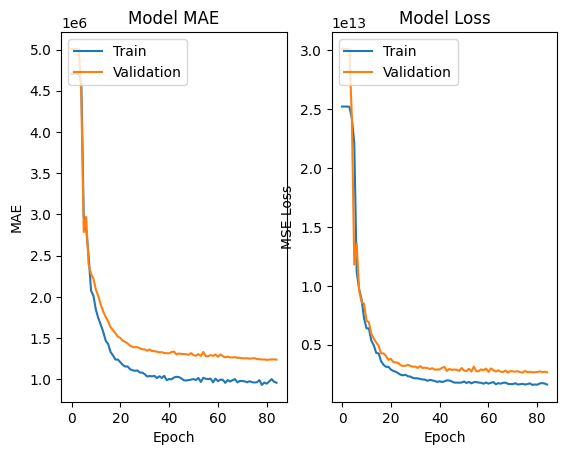

In [245]:
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Deployment

## Model Simulation

In [246]:
required_features = X.columns.tolist()


In [247]:
new_data = pd.DataFrame(0, index=[0], columns=required_features)

In [248]:
input_values = {
    'area': 1500,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'parking': 1,
    'mainroad_yes': 1,  # Already one-hot encoded
    'guestroom_yes': 0,
    'basement_yes': 1,
    'hotwaterheating_yes': 0,
    'airconditioning_yes': 1,
    'prefarea_yes': 1,
    'furnishingstatus_semi-furnished': 0,
    'furnishingstatus_unfurnished': 1
}

In [249]:
new_df = pd.DataFrame([input_data])

In [250]:
new_df = pd.get_dummies(new_df, columns=['mainroad', 'guestroom', 'basement',
                                        'hotwaterheating', 'airconditioning',
                                        'prefarea', 'furnishingstatus'],
                       drop_first=True)


In [251]:
new_df['area_per_bedroom'] = new_df['area'] / (new_df['bedrooms'] + 1)
new_df['bathroom_bedroom_ratio'] = new_df['bathrooms'] / (new_df['bedrooms'] + 1)
new_df['parking_per_area'] = new_df['parking'] / (new_df['area'] + 1)

In [252]:
missing_cols = set(X.columns) - set(new_df.columns)
for col in missing_cols:
    new_df[col] = 0

In [253]:
new_df = new_df[X.columns]

In [254]:
new_data_selected = new_df[selected_features]

In [255]:
new_data_reshaped = new_data_selected.values.reshape((1, new_data_selected.shape[1], 1))

In [256]:
predicted_price = model.predict(new_data_reshaped)[0][0]
print(f"Predicted House Price: Rp.{predicted_price:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
Predicted House Price: Rp.5,727,229,952.00


## Save Model

In [257]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Save the TFLite model
with open('enhanced_housing_price_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("\nEnhanced model successfully converted and saved as enhanced_housing_price_model.tflite")

Saved artifact at '/tmp/tmp9pyc8lzn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 1), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132496754048080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132496754048272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132496754044048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132496754045968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132496754042704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132496754047120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132498602771280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132498602786448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132498602786256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132498602771664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132494583234192: 

In [258]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the feature selector
with open('feature_selector.pkl', 'wb') as f:
    pickle.dump(selector, f)
